# Analysis of School Shootings
Kayla Fortson and Torri Green

[Website Link](https://kaylafortson.github.io)

# Project Dataset

The first dataset we have chosen is School Shootings since Columbine. This data set features data collected by The Washington Post. This data is collected through multiple sources such as: Nexis, news articles, open-source databases, law enforcement reports, information from school websites, and calls to schools and police departments. In order for the shooting to have been included in this database it must have taken place on campus immediately before, during, or right after classes took place. This database excludes colleges and universities. There are a total of 338 shootings documented in this dataset. This dataset is critical because it involves the loss of innocent lives and can give us insightful knowledge to bring awareness to this unimaginable terror. We would like to examine the frequencies, demographics, and trends of this data. The data set includes information such as the school name, district ID and name, date and time of shooting, location, school type, enrollment, count of victims, and information about the shooter and their weapon. Further information of this data set can be found [here](https://github.com/washingtonpost/data-school-shootings.git)

The second dataset is collected from the National Center for Education Statistics. “The Common Core of Data (CCD) is the Department of Education’s primary database on public elementary and secondary education in the United States. CCD is a comprehensive, annual, national database of all public elementary and secondary schools and school districts.” For this project we used the Elementary/Secondary Information System (EISi), which is an NCES web application that allows its users to formulate data tables. Therefore, we matched information for this dataset to our former dataset with schools that experienced school shootings. This data set features all of the schools within school districts that experienced a shooting for that year. For example, for the Columbine shooting in 1999, all of Jefferson County’s schools will be included in the data (if available). Within the schools that have not experienced school shootings we have a total of 22,934 schools and we removed any schools that experienced shootings to avoid duplicate data with our other dataset. We also removed all virtual schools. Some columns include but are not limited to: school name, district name, city, state, county,  school type, race, and enrollment. Further information regarding this data set can be found [here](https://nces.ed.gov/ccd/elsi/) 


# Project Goals

Utilizing these datasets, we hope to bring further awareness to such horrendous events. In other words, by analyzing this data efficiently we can better understand how school shootings take place, how they unfold, the demographics and trends of the data, and more. We can also compare such data to schools that have not experienced shootings. These observations can prove critical to inferring answers to questions that can save lives in the future. For example, what areas are higher risk to school shootings? We will infer the answers to questions regarding the frequencies, locations, and demographics behind school shootings and those that have not experienced shootings. 


# Collaboration Plan 

The plan for our project is to meet in person once a week. In the meantime, progress can be made on our project virtually by using Google colab to work together as well as a shared Github repository. 


# ETL


First we import all of the libaries we need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Shootings Dataset

Now we will read in and tidy our dataset of school shootings so that we can do some analysis later.

In [132]:
shootings_df = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-school-shootings/master/school-shootings-data.csv', encoding='ISO-8859-1')
shootings_df = shootings_df.set_index('uid').sort_index()

In [133]:
shootings_df.head()

,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112.0,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,583.0,0.0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.0,136.0,28.0,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,2736.0,27.0,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,755.0,287.0,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0


This table includes a ton of data but some of the columns are unnecessary for our analysis. For example, we won't be working with the latitude and longitude of the schools so we can drop these column.

In [134]:
shootings_df.drop(columns = ['nces_school_id', 'nces_district_id', 'lat', 'long', 'state_fips', 'county_fips'], inplace=True)

We reformat the school_year column for use later.

In [135]:
shootings_df['school_year'] = shootings_df['school_year'].str[:5] + shootings_df['school_year'].str[-2:]

We also want to check the dtypes so we can make corrections.

In [136]:
 shootings_df.dtypes

school_name                          object
district_name                        object
date                                 object
school_year                          object
year                                  int64
time                                 object
day_of_week                          object
city                                 object
state                                object
school_type                          object
enrollment                            int64
killed                                int64
injured                               int64
casualties                            int64
shooting_type                        object
age_shooter1                        float64
gender_shooter1                      object
race_ethnicity_shooter1              object
shooter_relationship1                object
shooter_deceased1                   float64
deceased_notes1                      object
age_shooter2                        float64
gender_shooter2                 

Some of our dtypes are off so we correct them here.

In [131]:
# Making sure categorical variables are classified correctly.
string_columns = ['shooter_deceased1', 'shooter_deceased2', 'resource_officer', 'ulocale', 'district_name']
shootings_df[string_columns] = shootings_df[string_columns].astype(str)

# Making most quantitative variables floats for consistency.
float_columns = ['enrollment', 'killed', 'injured', 'casualties']
shootings_df[float_columns] = shootings_df[float_columns].astype('float')

shootings_df.dtypes

school_name                          object
district_name                        object
date                                 object
school_year                          object
year                                  int64
time                                 object
day_of_week                          object
city                                 object
state                                object
school_type                          object
enrollment                          float64
killed                              float64
injured                             float64
casualties                          float64
shooting_type                        object
age_shooter1                        float64
gender_shooter1                      object
race_ethnicity_shooter1              object
shooter_relationship1                object
shooter_deceased1                    object
deceased_notes1                      object
age_shooter2                        float64
gender_shooter2                 

Finally, here is a final version of our dataframe.

In [137]:
shootings_df.head(10)

,school_name,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,staffing,low_grade,high_grade,lunch,county,ulocale
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Columbine High School,Jefferson County R-1,4/20/1999,1998-99,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112.0,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,89.6,9,12,41.0,Jefferson County,21.0
2,Scotlandville Middle School,East Baton Rouge Parish School Board,4/22/1999,1998-99,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,583.0,0.0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,39.0,6,8,495.0,East Baton Rouge Parish,12.0
3,Heritage High School,Rockdale County,5/20/1999,1998-99,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.0,136.0,28.0,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,84.0,9,12,125.0,Rockdale County,21.0
4,John Bartram High School,Philadelphia City SD,10/4/1999,1999-00,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,2736.0,27.0,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,41.0,9,12,2007.0,Philadelphia County,11.0
5,Dorchester High School,Boston,11/3/1999,1999-00,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,755.0,287.0,29.0,5.0,NaN,NaN,0,NaN,NaN,NaN,9,12,543.0,Suffolk County,11.0
6,Deming Middle School,Deming Public Schools,11/19/1999,1999-00,1999,12:45 PM,Friday,Deming,New Mexico,public,753,1,0,1,accidental or targeted,12.0,m,h,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,6.0,583.0,2.0,2.0,NaN,NaN,0,.22-caliber Colt revolver,home,44.0,6,7,502.0,Luna County,33.0
7,Fort Gibson Middle School,Fort Gibson,12/6/1999,1999-00,1999,7:45 AM,Monday,Fort Gibson,Oklahoma,public,407,0,5,5,indiscriminate,13.0,m,ai,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,3.0,12.0,0.0,153.0,NaN,NaN,0,Taurus 9mm pistol,father,25.4,6,8,146.0,Muskogee County,32.0
8,Ridgewood High School,Pasco,1/19/2000,1999-00,2000,3:00 PM,Wednesday,New Port Richey,Florida,public,1852,1,0,1,accidental,16.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.0,28.0,96.0,26.0,5.0,NaN,NaN,1,.22-caliber Magnum handgun,stolen,85.0,9,12,654.0,Pasco County,21.0
9,Alicia Reyes Elementary School,Merced City Elementary,1/26/2000,1999-00,2000,8:34 AM,Wednesday,Merced,California,public,734,0,0,0,targeted,13.0,m,NaN,no connection,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,40.0,389.0,222.0,1.0,NaN,NaN,0,.22 caliber revolver,NaN,36.0,KG,5,643.0,Merced County,13.0


## All Schools Dataset

Here we have a function that streamlines the tidying process for all of our data. Since we're combining data from NCES, we can apply the same changes to tidy every table while making a few exceptions and checks for some data that was only collected in certain years. This dataset includes all the schools from each district that experienced a school shooting in that year. (Ranges from 1998-2021)

In [ ]:
def read_data(filepath):
  '''
  Take in a filename as a string, make and tidy a dataframe using that data
  '''
  # get just the year part of the filepath
  year = filepath[-11:-4]

  # read in dataset
  schools = pd.read_csv(filepath)

  # remove virtual schools then we no longer need that column ignoring error if it doesn't exist.
  try:
    schools = schools[schools['Virtual School Status (SY 2016-17 onward) [Public School] ' + year] != 'FULLVIRTUAL']
    schools = schools[schools['Virtual School Status (SY 2016-17 onward) [Public School] ' + year] != 'FACEVIRTUAL']
    schools = schools.drop(columns='Virtual School Status (SY 2016-17 onward) [Public School] ' + year)
  except:
    pass

  # create columns for school year and type
  schools['school_year'] = year
  schools['school_type'] = 'public'

  # rename colummns
  schools = schools.rename(columns={
      'School Name': 'school_name',
      'State Name [Public School] Latest available year': 'state',
      'Agency Name [Public School] ' + year: 'district_name',
      'Location City [Public School] ' + year: 'city',
      'Total Students All Grades (Excludes AE) [Public School] ' + year: 'enrollment',
      'White Students [Public School] ' + year: 'white',
      'Black or African American Students [Public School] ' + year: 'black',
      'Hispanic Students [Public School] ' + year: 'hispanic',
      'Asian or Asian/Pacific Islander Students [Public School] ' + year: 'asian',
      'American Indian/Alaska Native Students [Public School] ' + year: 'american_indian_alaska_native',
      'Nat. Hawaiian or Other Pacific Isl. Students [Public School] ' + year: 'hawaiian_native_pacific_islander',
      'Two or More Races Students [Public School] ' + year: 'two_or_more',
      'Full-Time Equivalent (FTE) Teachers [Public School] ' + year: 'staffing',
      'Lowest Grade Offered [Public School] ' + year: 'low_grade',
      'Highest Grade Offered [Public School] ' + year: 'high_grade',
      'Free and Reduced Lunch Students [Public School] ' + year: 'lunch',
      'County Name [Public School] ' + year: 'county',
      'Locale [Public School] ' + year: 'ulocale',
  })

  # drop rows with adult education
  schools = schools[schools['low_grade'] != 'Adult Education']
  schools = schools[schools['low_grade'] != 'Ungraded']

  # reorder columns
  order = ['school_name', 'district_name', 'school_year', 'city', 'state', 'school_type',
          'enrollment', 'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native', 
          'hawaiian_native_pacific_islander', 'two_or_more', 'staffing', 'low_grade',
          'high_grade', 'lunch', 'county', 'ulocale']
  for col in order:
    if col not in schools.columns:
      schools[col] = np.nan
  schools = schools[order]

  # fix data capitalization
  string_cols = ['school_name', 'district_name', 'city', 'county', 'state']
  for col in string_cols:
    schools[col] = schools[col].astype(str).str.title()

  # get just the numerical code for ulocale
  schools['ulocale'] = schools['ulocale'].str[:2] + '.0'

  # shorten grade levels
  grade_levels = {'Prekindergarten': 'PK',
                  'Kindergarten': 'K',
                  '1st Grade': '1',
                  '2nd Grade': '2',
                  '3rd Grade': '3',
                  '4th Grade': '4',
                  '5th Grade': '5',
                  '6th Grade': '6',
                  '7th Grade': '7',
                  '8th Grade': '8',
                  '9th Grade': '9',
                  '10th Grade': '10',
                  '11th Grade': '11',
                  '12th Grade': '12',
                  '13th Grade': '13'
                  }
  schools['low_grade'] = schools['low_grade'].map(grade_levels)
  schools['high_grade'] = schools['high_grade'].map(grade_levels)

  # we're interested in the schools that are in the same districts as schools that had shootings
  districts = shootings_df[shootings_df['school_year'] == year]['district_name'].unique()
  schools = schools.drop(schools.loc[~schools['district_name'].isin(districts)].index).reset_index(drop=True)

  return schools

Here we iterate over a list of years to load in our NCES data and build the dataframe of those schools.

In [ ]:
years = ['1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04',
         '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
         '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
         '2016-17', '2017-18', '2018-19', '2019-20', '2020-21']
schools = pd.DataFrame()

for year in years:
  path = 'https://raw.githubusercontent.com/KaylaFortson/KaylaFortson.github.io/main/' + year + '.csv'
  data = read_data(path)
  schools = schools.append(data)

schools = schools.reset_index(drop=True)

Our final dataframe of schools.

In [ ]:
schools.head()

# EDA

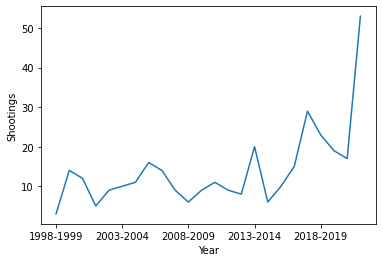

In [ ]:
shootings_per_year = shootings_df.copy() 
shootings_per_year = shootings_per_year['school_year'].value_counts().to_frame()
shootings_per_year = shootings_per_year.sort_index(ascending=True)
shootings_per_year.plot(xlabel="Year", ylabel="Shootings", legend=False)

The above graph maps the number of shootings recorded per year. This trend shows an overall increase in shootings with the largest spike taking place in 2021 (42 shootings). The lowest amount of shootings took place in 2002 (5 shootings). This is an extremely significant observation because it shows how there is an upward trend in the number of shootings per year. Therefore, this means that this is a growing issue that needs to be addressed immediately and has yet to be properly resolved. 

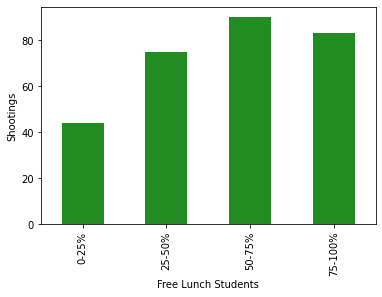

In [ ]:
# "it is evident that as the number of students who are receiving free lunches at the school increases, the number of shootings increase as well." 
# This is indeed an interesting analysis. But, I think we should consider what the overall distribution of schools by free lunch percentage looks like first. 
# E.g., if there are simply more schools with a high percentage of free lunch, then that could also explain the relationship. 
# Perhaps something like normalizing the y-axis by the number of schools in each bin would help?

free_lunch = shootings_df[['school_name','lunch','enrollment']].copy()
free_lunch['pct'] = free_lunch['lunch'] / free_lunch['enrollment']
free_lunch['pct'].describe()
range_1 = free_lunch[free_lunch['pct'] <= 0.25].copy()
range_2 = free_lunch[(free_lunch['pct'] > 0.25) & (free_lunch['pct'] <= 0.50)].copy()
range_3 = free_lunch[(free_lunch['pct'] > 0.50) & (free_lunch['pct'] <= 0.75)].copy()
range_4 = free_lunch[(free_lunch['pct'] > 0.75) & (free_lunch['pct'] <= 1.0)].copy()

range_1['category'] = '0-25%'
range_2['category'] = '25-50%'
range_3['category'] = '50-75%'
range_4['category'] = '75-100%'

order = ['0-25%', '25-50%', '50-75%', '75-100%']
grouped_ranges = pd.concat([range_1, range_2, range_3, range_4])
ranges_counts = grouped_ranges.category.value_counts()
ranges_counts = ranges_counts.reindex(order)
ranges_counts.plot.bar(ylabel='Shootings', xlabel='Free Lunch Students', color="forestgreen")

The above bar graph shows the correlation between the percentage of Students who received free lunches due to financial reasons and the number of shootings. The percentage of students receiving free lunch was calculated in regards to that school's enrollment. From analzying the graph, it is evident that as the number of students who are receiving free lunches at the school increases, the number of shootings increase as well. Typically, free lunches are given to students on a financial need basis. This leads to the question of if there are more students struggling financially at a school, is there a higher probability of a shooting taking place on that campus? This observation is important because it can inform others to focus resourcees on low-income schools to help prevent school shootings. 

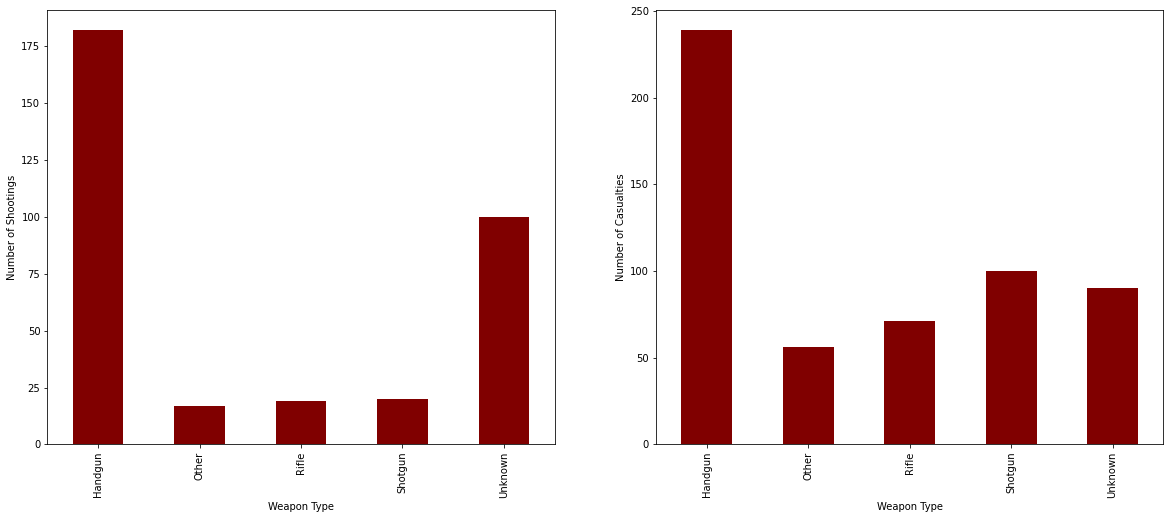

In [ ]:
%%capture --no-display
shootings_weapon_type = shootings_df.copy()
weapons = shootings_weapon_type[["weapon", "casualties"]]
#weapon categories and assignment
searchfor =["Handgun", "Rifle", "Shotgun", "Unknown"]
weapons = weapons.fillna("")
weapons["weapon"][weapons["weapon"].str.contains("shotgun")] ="Shotgun" 
weapons["weapon"][weapons["weapon"].str.contains("rifle")] ="Rifle"
weapons["weapon"][weapons["weapon"].str.contains("handgun")] ="Handgun"
weapons["weapon"][weapons["weapon"].str.contains("pistol")] ="Handgun"
weapons["weapon"][weapons["weapon"].str.contains("revolver")] ="Handgun"
weapons["weapon"][weapons["weapon"].__eq__("")] ="Unknown" 
weapons["weapon"][~weapons["weapon"].str.contains("Handgun") & ~weapons["weapon"].str.contains("Rifle") & ~weapons["weapon"].str.contains("Shotgun") & ~weapons["weapon"].str.contains("Unknown")] ="Other"

# Specifies a 1 x 5 grid of plots, figsize in inches
figure, axes = plt.subplots(1, 2, figsize=(20, 8))
weapons.groupby("weapon").count().plot.bar(ylabel="Number of Shootings", xlabel="Weapon Type", color="maroon", legend=False , ax=axes[0])
weapons.groupby("weapon").sum().plot.bar(ylabel="Number of Casualties", xlabel="Weapon Type", color="maroon", legend=False , ax=axes[1])
#plt.show()

This weapon analysis shows the number of casualties and shootings based on weapon type from 1998-2022. On the left side, it shows that the handgun was used in the greatest number of shootings. This may explain that a handgun is more attainable than other weapon types. Rifles, shotguns, and other weapon types were very close in the amount of times they were used, meaning they all may be similarly attainable. However, if you look closely the type of weapon that was the most rarely used was the rifle (besides other types). 

On the right hand side, the bar graph shows the number of casualties in relation to weapon type. Here, handguns is also the highest most likely because they were involved in the greatest number of shootings. Shotguns were more responsible for deaths than rifles were. There were also more undocumented/unknown weapon caused deaths than weapons that did not fit into the categories of handgun, rifles, or shotguns (other). 